([21, 39, 62, 57, 61, 17, 25, 24, 68, 23, 78, 43, 81, 2, 84, 27, 9, 74, 15, 29, 22, 28, 0, 69, 66, 3, 52, 76, 65, 5, 73, 56, 59, 8, 83, 31, 70, 33, 1, 42, 14, 95, 80, 92, 47, 86, 90, 79, 91, 35, 40, 82, 67, 77, 50, 20, 12, 41, 49, 44, 19, 51, 4, 36, 60, 6, 87, 16, 54, 75, 85, 55, 96, 53, 37, 34, 45, 7, 94, 99, 58, 26, 93, 97, 64, 100, 38, 48, 72, 10, 46, 71, 18, 13, 98, 32, 11, 63, 30, 88, 89], 5429.313774157274)
([72, 38, 44, 25, 98, 34, 90, 37, 53, 42, 14, 76, 65, 52, 92, 64, 95, 5, 60, 23, 68, 28, 0, 79, 45, 50, 89, 33, 1, 11, 63, 88, 30, 66, 20, 86, 47, 26, 93, 99, 58, 22, 51, 59, 8, 4, 36, 17, 43, 57, 78, 61, 73, 56, 69, 3, 12, 39, 62, 21, 19, 7, 94, 77, 87, 6, 31, 70, 83, 100, 80, 97, 55, 96, 85, 54, 16, 48, 10, 27, 84, 2, 9, 49, 35, 91, 82, 40, 67, 75, 15, 71, 18, 74, 46, 41, 29, 81, 13, 24, 32], 242940.58424861872)
([32, 66, 88, 70, 31, 83, 23, 57, 78, 56, 73, 34, 7, 94, 45, 87, 6, 96, 55, 95, 97, 86, 47, 90, 44, 21, 62, 1, 33, 89, 5, 4, 60, 36, 22, 28, 26, 93, 38, 72, 10, 85, 

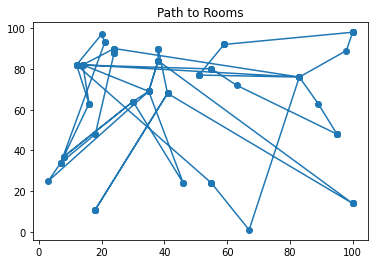

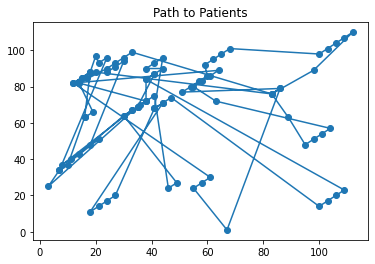

1242.7374556064606


In [21]:
from Patient import Patient
from Room import Room
import pandas as pd
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import time

######## READ DATA ###########
Patient_data = pd.read_csv('Patient100.csv')
Rooms_data = pd.read_csv('Rooms.csv')

######## Variables ##########

# random.seed(10)

def init_rooms(Rooms_data):
    room_dict = {}
    for room in Rooms_data.iterrows():
        room_dict[room[1]['id']] = Room(room[1]['id'],room[1]['x'],room[1]['y'])
    return room_dict


def init_patient(Patient_data,r_data):
    patient_array = []
    for patient in Patient_data.iterrows():
        patient_array.append(Patient(patient[1]['id'],r_data[patient[1]['room']],patient[1]['urgency'], patient[1]['typeofdisease']))
    return patient_array

def calc_dist(room1 , room2):
    return(math.sqrt(((room1[0] - room2[0])**2) + ((room1[1] - room2[1])**2)))



def room_distance_matrix(room_data):
    df = pd.DataFrame(columns=range(1,len(room_data)+1), index=range(1,len(room_data)+1))
    for i in room_data.keys():
        for j in room_data.keys():
            df.at[i,j] = calc_dist(room_data[i].get_loc(),room_data[j].get_loc())
    return df

def patient_distance_matrix(patient_data):
    df = pd.DataFrame(columns=range(1,len(patient_data)+1), index=range(1,len(patient_data)+1))
    for i in range(1,len(patient_data)+1):
        for j in range(1,len(patient_data)+1):
            df.at[i,j] = calc_dist(patient_data[i-1].room.get_loc(), patient_data[j-1].room.get_loc())
    return df


################# for plot ###########################
# def plotonimage(room_data):
#     x_arr = []
#     y_arr = []
#     for room in room_data.values():
#         temp_room_loc = room.get_loc()
#         x_arr.append(temp_room_loc[0])
#         y_arr.append(temp_room_loc[1])
#
#     plt.plot(x_arr , y_arr, linestyle = 'dashed', marker='s')
#
#     # plt.scatter(x_arr,y_arr)
#     plt.show()

################# for plot ###########################




def randomSolution(tsp):
    patients = list(range(len(tsp)))
    solution = []

    for i in range(len(tsp)):
        random_patient = patients[random.randint(0, len(patients) - 1)]
        solution.append(random_patient)
        patients.remove(random_patient)

    return solution

def objective_function(tsp, solution, patients, robot_speed,cost):
    target_value = 0
    time_of = 0
    for i in range(len(solution)):
        time_of += (tsp[solution[i - 1]][solution[i]] / robot_speed) + patients[solution[i-1]].type_of_disease
        latency = max((time_of - patients[solution[i-1]].urgency), 0)
        target_value = (time_of + latency * cost)
    return target_value

def getNeighbours(solution):
    neighbours = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbour = solution.copy()
            neighbour[i] = solution[j]
            neighbour[j] = solution[i]
            neighbours.append(neighbour)
    return neighbours

def getBestNeighbour(tsp, neighbours, patients, robot_speed,cost):
    bestRouteLength = objective_function(tsp, neighbours[0], patients, robot_speed, cost)
    bestNeighbour = neighbours[0]
    for neighbour in neighbours:
        currentRouteLength = objective_function(tsp, neighbour, patients, robot_speed, cost)
        if currentRouteLength < bestRouteLength:
            bestRouteLength = currentRouteLength
            bestNeighbour = neighbour
    return bestNeighbour, bestRouteLength

def hillClimbing(tsp, patients, robot_speed, cost, max_time, time_limit):
    currentSolution = randomSolution(tsp)
    currentRouteLength = objective_function(tsp, currentSolution, patients, robot_speed, cost)
    neighbours = getNeighbours(currentSolution)
    bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours,patients, robot_speed, cost)
    start_time = time.time()
    if time_limit:
        while not isDone(start_time, max_time):  ## checks if the algorithm has more time to run
            neighbours = getNeighbours(currentSolution)
            bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours, patients, robot_speed, cost)
            if bestNeighbourRouteLength < currentRouteLength:
                currentRouteLength = bestNeighbourRouteLength
                currentSolution = bestNeighbour
    else:
        while bestNeighbourRouteLength < currentRouteLength:
            currentSolution = bestNeighbour
            currentRouteLength = bestNeighbourRouteLength
            neighbours = getNeighbours(currentSolution)
            bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours, patients, robot_speed, cost)
    return currentSolution, currentRouteLength

def isDone(start_time, max_time):
    return time.time() - start_time > max_time

def hill_climb_algorithm(matrix, patients, robot_speed, cost, max_time, time_limit):
    tsp = matrix.values.tolist()
    return(hillClimbing(tsp, patients, robot_speed, cost, max_time, time_limit))

def patient_to_room_arr(pat_arr,patient_data):
    room_arr = []
    x_arr = []
    y_arr =[]
    # room_arr.append(patient_data[pat_arr[0]].room.get_loc())
    for patient in pat_arr:
        room_arr.append(patient_data[patient].room.get_loc())
    # print(room_arr)
    for cord in room_arr:
        x_arr.append(cord[0])
        y_arr.append(cord[1])
    fig, ax = plt.subplots()
    u = np.diff(x_arr)
    v = np.diff(y_arr)
    u = np.array([2 if x == 0 else x for x in u])
    v = np.array([2 if x == 0 else x for x in v])
    pos_x = x_arr[:-1] + u / 2
    pos_y = y_arr[:-1] + v / 2
    norm = np.sqrt(abs(u * 2 + v * 2))
    ax.plot(x_arr[:-1], y_arr[:-1], marker="o")
    # ax.quiver(pos_x, pos_y, u / norm, v / norm, angles="xy", zorder=5, pivot='mid')
    plt.title("Path to Rooms")
    plt.show()
    for i in range(0,len(x_arr)-1):
        j = i
        if j >= (len(x_arr)-1):
            break
        while x_arr[i] == x_arr[j+1] and y_arr[i] == y_arr[j+1]:
            x_arr[j + 1] = x_arr[j + 1] + 3
            y_arr[j + 1] = y_arr[j + 1] + 3
            if (j+1) < (len(x_arr) - 1):
                j = j + 1
            else:
                break
    fig, ax = plt.subplots()
    u = np.diff(x_arr)
    v = np.diff(y_arr)
    u = np.array([2 if x == 0 else x for x in u])
    v = np.array([2 if x == 0 else x for x in v])
    pos_x = x_arr[:-1] + u / 2
    pos_y = y_arr[:-1] + v / 2
    norm = np.sqrt(abs(u * 2 + v * 2))
    ax.plot(x_arr[:-1], y_arr[:-1], marker="o")
    # ax.quiver(pos_x, pos_y, u / norm, v / norm, angles="xy", zorder=5, pivot='mid')
    plt.title("Path to Patients")
    plt.show()

if __name__ == '__main__':
    start_time = time.time()
    room_data = init_rooms(Rooms_data)
    patient_data = init_patient(Patient_data, room_data)
    rooms_dist_matrix = room_distance_matrix(room_data)
    patients_dist_matrix = patient_distance_matrix(patient_data)
    robot_speed= 6
    cost = 200
    time_limit = False
    max_time = 10
    # plotonimage(room_data)
    # for robot_speed in range(2,10):
    for cost in range(0,501,50):
#     for max_time in range(5,9,5):
        hill_climb_result = hill_climb_algorithm(patients_dist_matrix, patient_data, robot_speed, cost, max_time, time_limit)
        print(hill_climb_result)

    patient_to_room_arr(hill_climb_result[0],patient_data)
    print(time.time() - start_time)

In [25]:
from numpy import matrix

from Patient import Patient
from Room import Room
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
# import mlrose
import numpy as np
from numpy.random import randint
from numpy.random import rand
from datetime import datetime


######## READ DATA ###########
Patient_data = pd.read_csv('Patient100.csv')
Rooms_data = pd.read_csv('Rooms.csv')
random.seed(10)

######## Variables ##########
ROBOT_SPEED = 6
COST = 0


def init_rooms(Rooms_data):
    room_dict = {}
    for room in Rooms_data.iterrows():
        room_dict[room[1]['id']] = Room(room[1]['id'], room[1]['x'], room[1]['y'])
    return room_dict


def init_patient(Patient_data, r_data):
    patient_array = []
    for patient in Patient_data.iterrows():
        patient_array.append(
            Patient(patient[1]['id'], r_data[patient[1]['room']], patient[1]['urgency'], patient[1]['typeofdisease']))
    return patient_array


def calc_dist(room1, room2):
    return (math.sqrt(((room1[0] - room2[0]) ** 2) + ((room1[1] - room2[1]) ** 2)))


def room_distance_matrix(room_data):
    df = pd.DataFrame(columns=range(1, len(room_data) + 1), index=range(1, len(room_data) + 1))
    for i in room_data.keys():
        for j in room_data.keys():
            df.at[i, j] = calc_dist(room_data[i].get_loc(), room_data[j].get_loc())
    return df


def patient_distance_matrix(patient_data):
    df = pd.DataFrame(columns=range(1, len(patient_data) + 1), index=range(1, len(patient_data) + 1))
    for i in range(1, len(patient_data) + 1):
        for j in range(1, len(patient_data) + 1):
            df.at[i, j] = calc_dist(patient_data[i - 1].room.get_loc(), patient_data[j - 1].room.get_loc())
    return df


# objective functions
def compute_patient_distance_coordinates(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5


def objective_function(patient_a, patient_b, patients_dict):
    target_value = 0
    distance = compute_patient_distance_coordinates(patients_dict[patient_a], patients_dict[patient_b])
    for pat in patient_data:
        if str(pat.id) == patient_a:
            time_of = (distance / robot_speed) + pat.type_of_disease
            latency = max((time_of - pat.urgency), 0)
            target_value = (time_of + latency * cost)

    return target_value


# First step: Create the first population set
def genesis(patient_list, n_population):
    population_set = []
    for i in range(n_population):
        # Randomly generating a new solution
        sol_i = patient_list[np.random.choice(list(range(n_patients)), n_patients, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)


# 2. Evaluation of the fitnesss

# individual solution
def fitnesss_eval(patient_list, patients_dict):
    total = 0
    for i in range(n_patients - 1):
        a = patient_list[i]
        b = patient_list[i + 1]
        total += objective_function(a, b, patients_dict)
    return total


# All solutions
def get_all_fitness(population_set, patients_dict):
    fitness_list = np.zeros(n_population)

    # Looping over all solutions computing the fitness for each solution
    for i in range(n_population):
        fitness_list[i] = fitnesss_eval(population_set[i], patients_dict)

    return fitness_list


# 3. Selecting the progenitors
def progenitor_selection(population_set, fitness_list):
    total_fit = fitness_list.sum()
    prob_list = fitness_list / total_fit

    # Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set), p=prob_list,
                                         replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set), p=prob_list,
                                         replace=True)

    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]

    return np.array([progenitor_list_a, progenitor_list_b])


# Pairs crossover
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for patient in prog_b:

        if not patient in offspring:
            offspring = np.concatenate((offspring, [patient]))

    return offspring


# Finding pairs of mates
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)

    return new_population_set


# Offspring production
def mutate_offspring(offspring):
    for q in range(int(n_patients * mutation_rate)):
        a = np.random.randint(0, n_patients)
        b = np.random.randint(0, n_patients)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring


# New populaiton generation
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop


if __name__ == '__main__':
    for i in range(0,501,50):
        cost = i
        print(cost)
        room_data = init_rooms(Rooms_data)
        patient_data = init_patient(Patient_data, room_data)
        rooms_dist_matrix = room_distance_matrix(room_data)
        patients_dist_matrix = patient_distance_matrix(patient_data)
        fitness_list = patients_dist_matrix.values.tolist()[0]
        patient_coordinates_list = []
        names_list = []
        for i in patient_data:
            patient_coordinates_list.append([i.room.x, i.room.y])
        for i in patient_data:
            names_list.append(str(i.id))
        names_list = np.asarray(names_list)

        n_patients = 50
        n_population = 50
        mutation_rate = 0.01
        robot_speed = 6
#         cost = 200
        generations = 200

        patients_dict = {x: y for x, y in zip(names_list, patient_coordinates_list)}
        population_set = genesis(names_list, n_population)
        fitness_list = get_all_fitness(population_set, patients_dict)
        progenitor_list = progenitor_selection(population_set, fitness_list)
        new_population_set = mate_population(progenitor_list)
        mutated_pop = mutate_population(new_population_set)

        # Everything put together
        best_solution = [-1, np.inf, np.array([])]
        generations_list = []
        min_val_list = []
        mean_val_list = []
    
        
        for i in range(0,generations):
            # if i % 100 == 0: print(best_solution, fitness_list.min(), datetime.now().strftime("%d/%m/%y %H:%M"))
            fitness_list = get_all_fitness(mutated_pop, patients_dict)
            # Saving the best solution
            if fitness_list.min() < best_solution[1]:
                best_solution[0] = i
                best_solution[1] = fitness_list.min()
                best_solution[2] = np.array(mutated_pop)[fitness_list.min() == fitness_list]
                print(best_solution, fitness_list.min())
            generations_list.append(i)
            min_val_list.append(fitness_list.min())
            mean_val_list.append(fitness_list.mean())
            progenitor_list = progenitor_selection(population_set, fitness_list)
            new_population_set = mate_population(progenitor_list)

            mutated_pop = mutate_population(new_population_set)

# fig = plt.figure()
# ax = fig.add_subplot()
# plt.plot(generations_list, min_val_list)
# plt.title('Genetic Best Values')
# plt.xlabel('generation')
# plt.ylabel('objective function')

# fig = plt.figure()
# ax = fig.add_subplot()
# plt.plot(generations_list, mean_val_list)
# plt.title('Genetic Mean Values')
# plt.xlabel('generation')
# plt.ylabel('objective function')

0
[0, 3002.9131571056196, array([['44', '27', '9', '23', '35', '6', '13', '28', '25', '43', '29',
        '15', '4', '14', '34', '12', '2', '17', '46', '19', '31', '45',
        '11', '39', '21', '10', '33', '1', '41', '16', '7', '26', '37',
        '22', '42', '18', '40', '47', '8', '3', '38', '49', '24', '48',
        '32', '20', '36', '0', '30', '5']], dtype='<U3')] 3002.9131571056196
[1, 2976.647503505452, array([['18', '13', '31', '1', '27', '34', '45', '11', '33', '32', '12',
        '44', '43', '0', '21', '7', '8', '23', '24', '22', '47', '29',
        '6', '25', '3', '36', '17', '49', '28', '48', '26', '46', '35',
        '16', '9', '4', '20', '39', '5', '42', '14', '37', '19', '30',
        '10', '38', '15', '41', '2', '40']], dtype='<U3')] 2976.647503505452
50
[0, 5685.256828684646, array([['11', '2', '29', '42', '34', '14', '31', '48', '7', '24', '16',
        '0', '10', '17', '43', '40', '37', '35', '28', '8', '32', '23',
        '27', '44', '19', '26', '6', '4', '47', '36'

200
[0, 19641.015708365492, array([['26', '3', '27', '10', '9', '36', '20', '14', '45', '35', '49',
        '34', '24', '33', '32', '38', '41', '7', '29', '2', '19', '43',
        '5', '23', '30', '39', '13', '8', '16', '47', '48', '6', '18',
        '15', '37', '17', '1', '28', '44', '42', '11', '12', '31', '46',
        '22', '25', '40', '21', '4', '0']], dtype='<U3')] 19641.015708365492
[1, 10025.155545850192, array([['37', '10', '41', '12', '38', '45', '5', '39', '7', '49', '3',
        '24', '27', '25', '16', '15', '13', '17', '6', '11', '33', '19',
        '46', '9', '42', '30', '28', '22', '44', '21', '48', '36', '29',
        '26', '1', '2', '34', '4', '32', '8', '40', '0', '47', '20',
        '31', '43', '23', '35', '14', '18']], dtype='<U3')] 10025.155545850192
[3, 10018.2127495496, array([['14', '26', '41', '44', '34', '45', '5', '39', '7', '49', '3',
        '24', '27', '25', '16', '15', '13', '17', '6', '11', '33', '19',
        '46', '9', '42', '30', '28', '10', '37', '22

[33, 17202.065127072998, array([['40', '26', '1', '46', '45', '31', '21', '4', '42', '10', '19',
        '0', '37', '49', '28', '38', '3', '13', '8', '41', '33', '43',
        '23', '7', '36', '30', '39', '11', '47', '34', '24', '14', '2',
        '16', '27', '20', '48', '32', '6', '44', '25', '17', '15', '29',
        '35', '5', '9', '22', '12', '18']], dtype='<U3')] 17202.065127072998
[34, 16443.701158756587, array([['1', '33', '14', '45', '20', '31', '21', '4', '42', '10', '19',
        '0', '37', '49', '28', '38', '3', '13', '8', '41', '43', '23',
        '7', '36', '30', '39', '11', '47', '34', '24', '2', '16', '27',
        '40', '46', '48', '32', '6', '44', '25', '26', '17', '15', '29',
        '35', '5', '9', '22', '12', '18']], dtype='<U3')] 16443.701158756587
[51, 16125.793003947358, array([['21', '6', '16', '20', '33', '31', '4', '45', '42', '10', '19',
        '0', '37', '49', '28', '38', '3', '13', '8', '1', '41', '43',
        '23', '7', '36', '30', '39', '11', '47', '34'